<a href="https://colab.research.google.com/github/101kings/bank-loan-python/blob/main/bank_loan_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [2]:
prev_app=pd.read_csv('/content/previous_application.csv')
app_df=pd.read_csv('/content/application_data.csv')

In [3]:
app_df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
prev_app.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1.0,0.0,0.182832,0.867336,XAP,Approved,-73.0,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1.0,NaN,NaN,NaN,XNA,Approved,-164.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1.0,NaN,NaN,NaN,XNA,Approved,-301.0,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1.0,NaN,NaN,NaN,XNA,Approved,-512.0,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1.0,NaN,NaN,NaN,Repairs,Refused,-781.0,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
app_df.shape

(21340, 122)

In [7]:
missing= pd.DataFrame(app_df.isnull().sum().sort_values(ascending=False)).reset_index()
missing.rename(columns={'index':'column_name',0:'null_count'},inplace=True)
missing=missing[missing['null_count']>0]
missing['null_percentage']=missing['null_count']/app_df.shape[0]*100
missing

,column_name,null_count,null_percentage
0,COMMONAREA_MEDI,14942,70.018744
1,COMMONAREA_AVG,14941,70.014058
2,COMMONAREA_MODE,14941,70.014058
3,NONLIVINGAPARTMENTS_MEDI,14814,69.418932
4,NONLIVINGAPARTMENTS_MODE,14814,69.418932
5,NONLIVINGAPARTMENTS_AVG,14813,69.414246
6,FONDKAPREMONT_MODE,14627,68.542643
7,LIVINGAPARTMENTS_MEDI,14593,68.383318
8,LIVINGAPARTMENTS_MODE,14593,68.383318
9,LIVINGAPARTMENTS_AVG,14592,68.378632


In [8]:
missing_col=missing[missing['null_percentage']>=40]['column_name'].to_list()
missing_col


['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MODE',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'BASEMENTAREA_AVG',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'APARTMENTS_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'ENTRANCES_AVG',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATIO

In [9]:
app_df=app_df.drop(labels=missing_col,axis=1)
app_df.shape

(21340, 73)

In [10]:
fal_col=[]
for col in app_df.columns:
  if col.startswith('FLAG_'):
    fal_col.append(col)
fal_col

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [11]:
flag_targ=app_df[fal_col+['TARGET']]
flag_targ.head(3)

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,N,N,1,1,0,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Y,Y,1,1,1,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


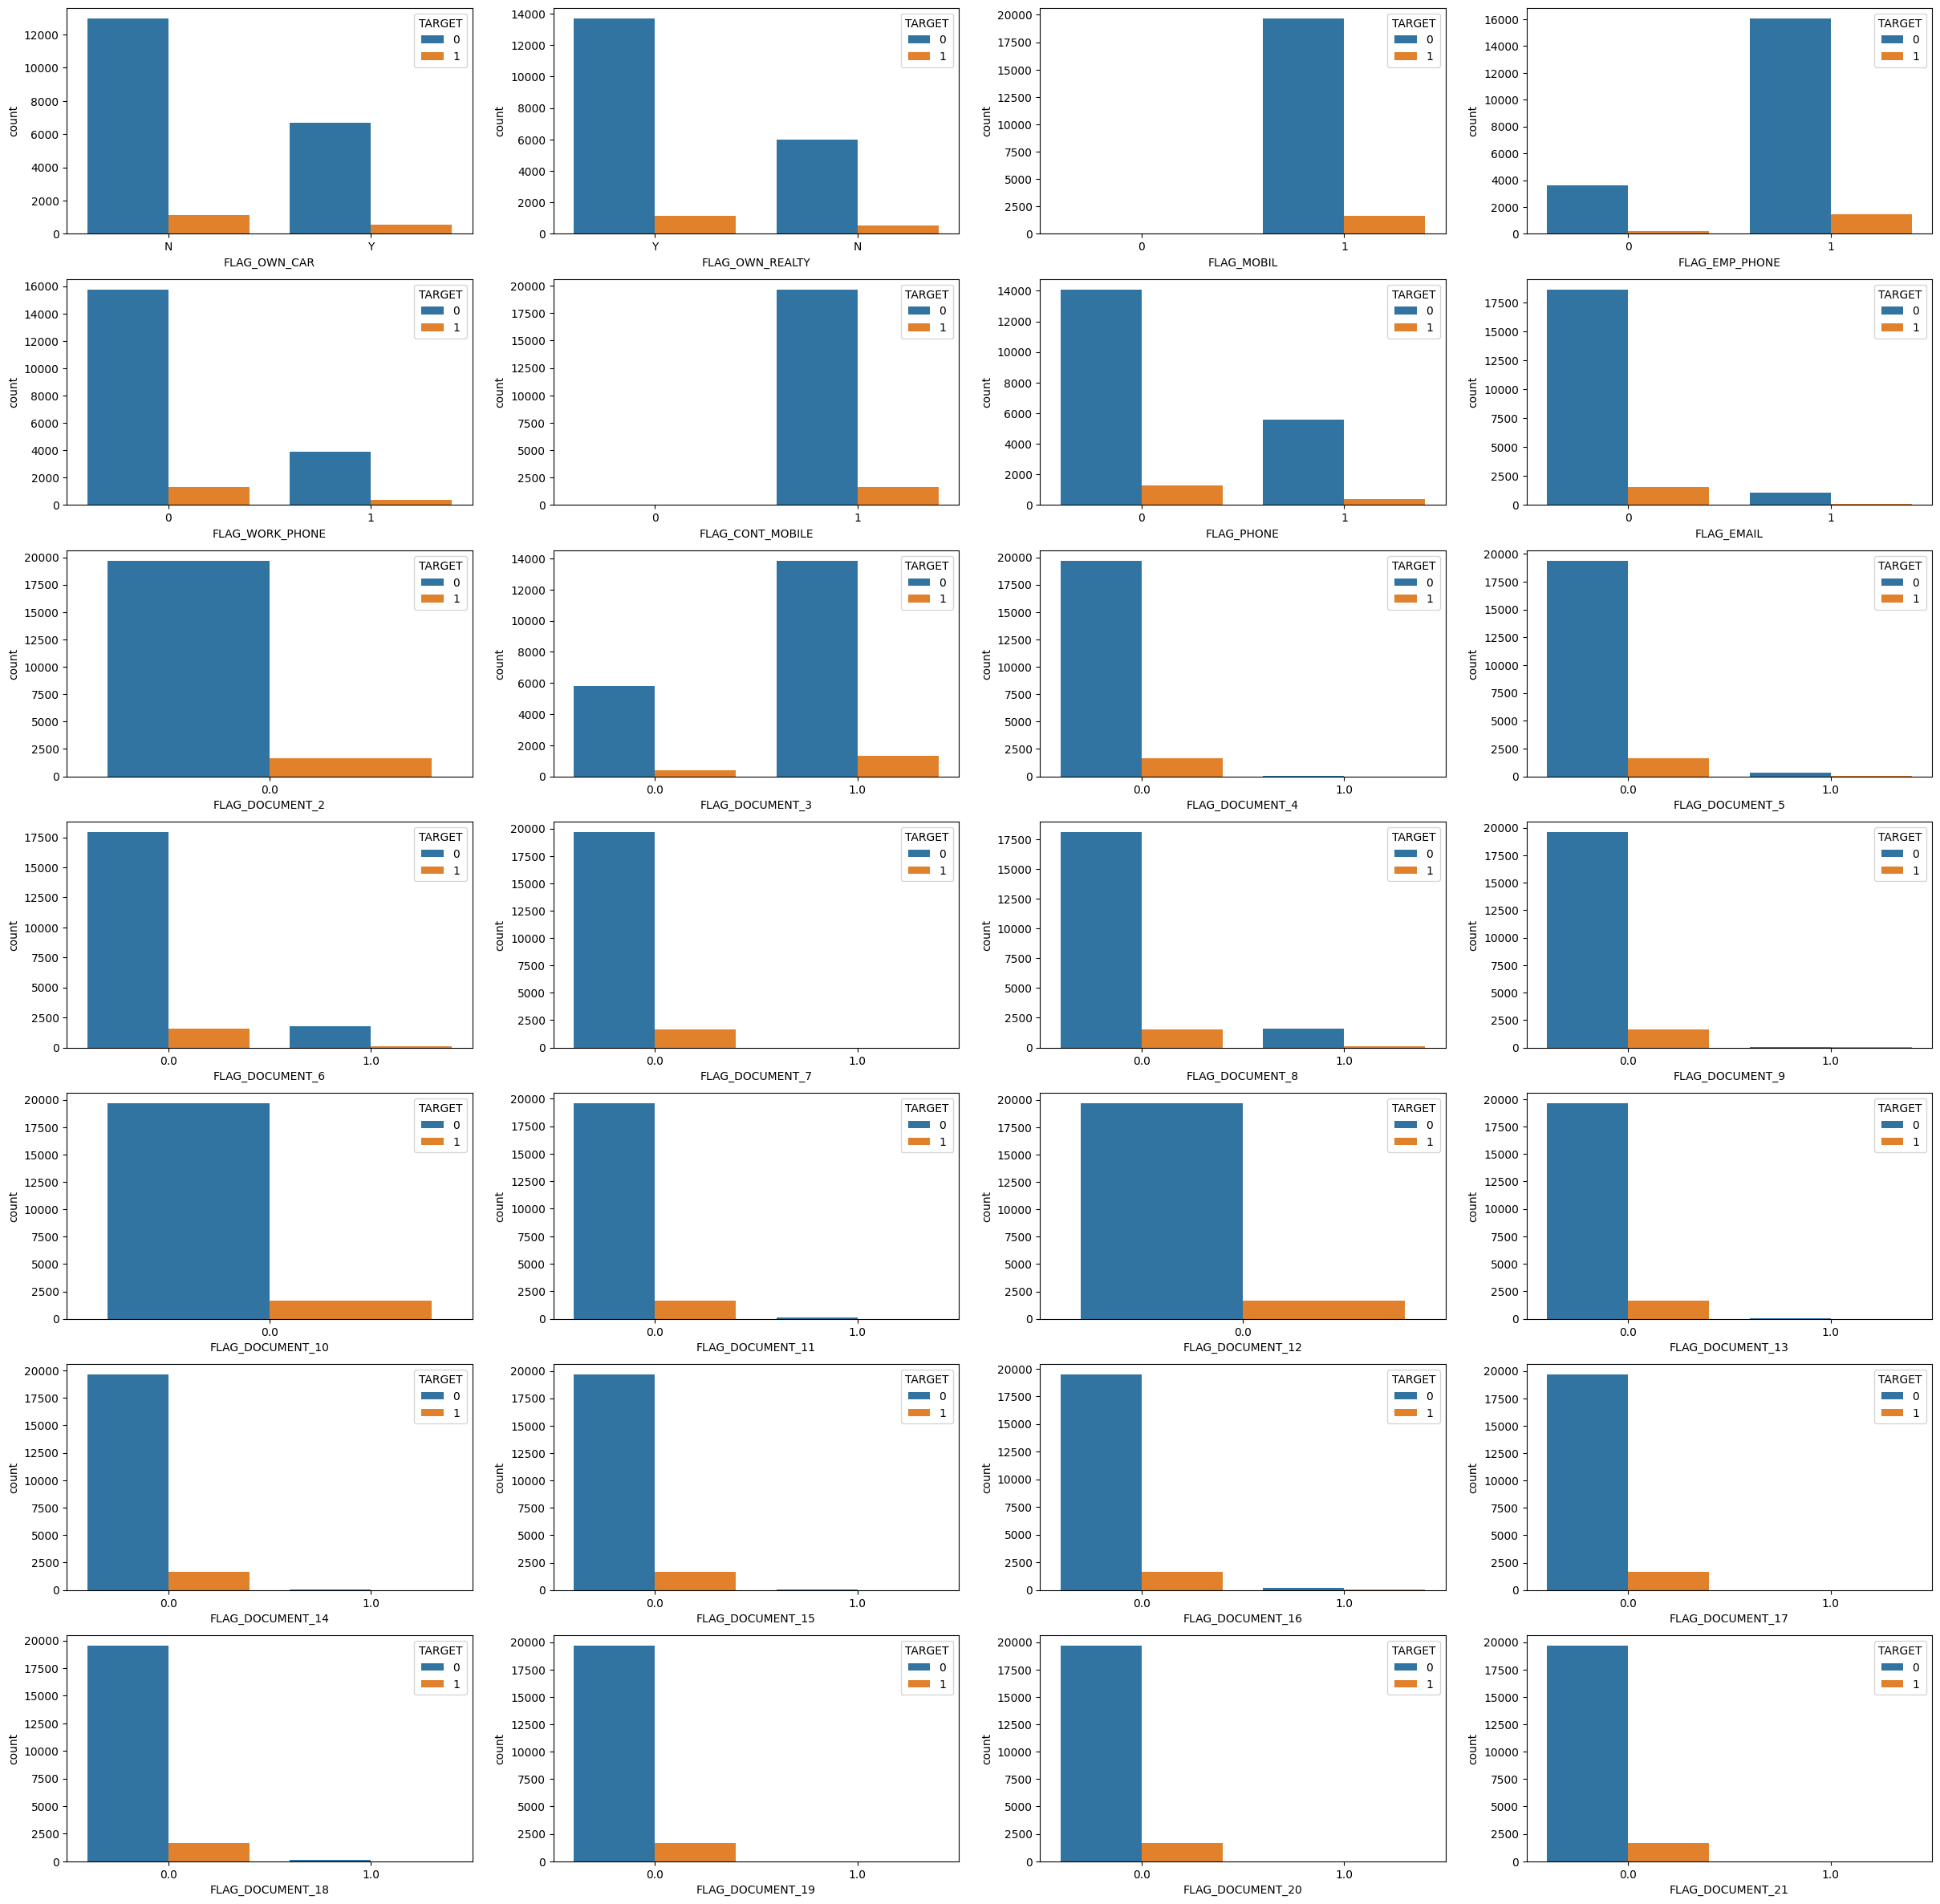

In [12]:
plt.figure(figsize=(30,30))
for i,col in enumerate (fal_col):
  plt.subplot(7,4,i+1)
  sns.countplot(x=col,data=flag_targ,hue='TARGET')




In [13]:
corr=['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
        'FLAG_PHONE','FLAG_EMAIL','TARGET']
flag_corr=app_df[corr]
flag_corr.head(5)

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
0,N,Y,1,1,0,1,1,0,1
1,N,N,1,1,0,1,1,0,0
2,Y,Y,1,1,1,1,1,0,0
3,N,Y,1,1,0,1,0,0,0
4,N,Y,1,1,0,1,0,0,0


/tmp/ipython-input-153834732.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flag_corr=flag_corr.replace({'N':0,'Y':1})


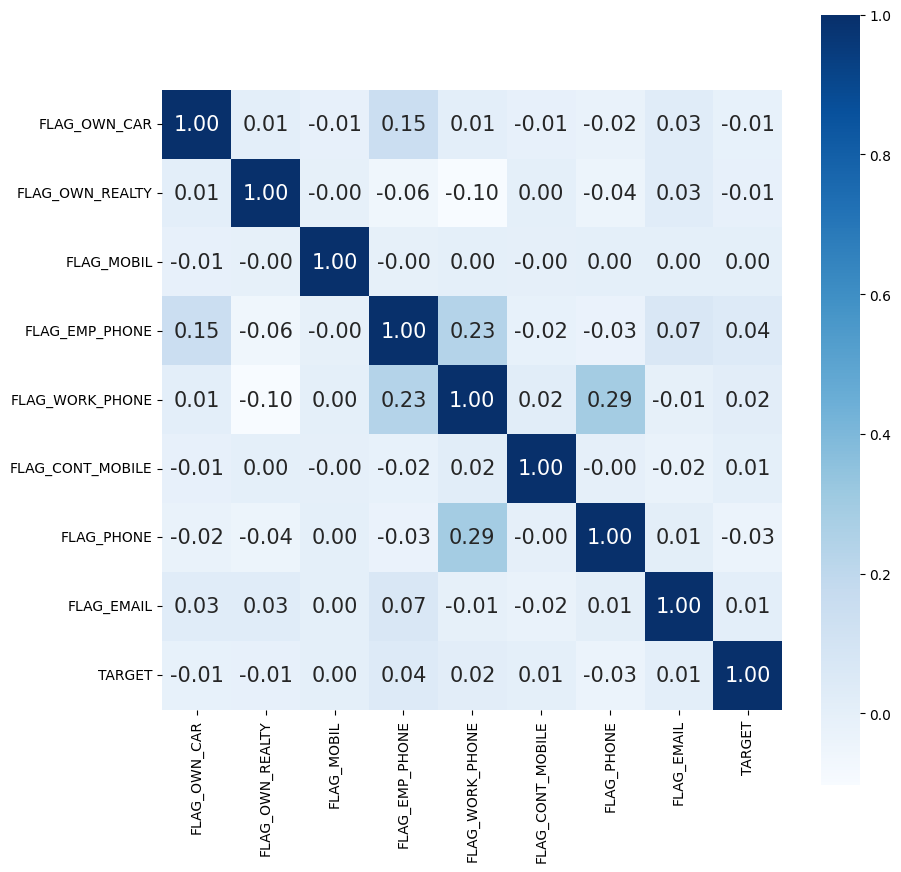

In [14]:
flag_corr=flag_corr.replace({'N':0,'Y':1})
flag_corr_df=flag_corr.corr()
plt.figure(figsize=(10,10))
sns.heatmap(flag_corr_df,annot=True,cmap='Blues',fmt='.2f',annot_kws={'size':15},square=True)
plt.show()

In [15]:
app_df=app_df.drop(labels=fal_col,axis=1)
app_df.shape

(21340, 45)

In [16]:
app_df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

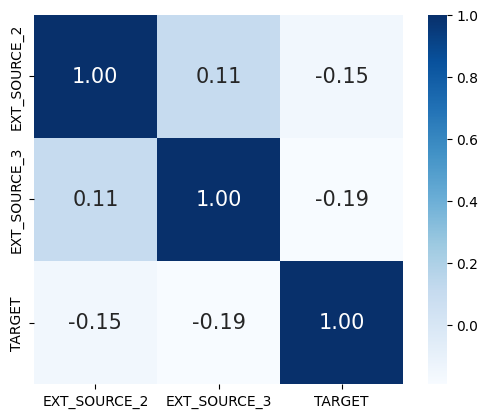

In [17]:
sns.heatmap(app_df[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),cmap='Blues',annot=True,fmt='.2f',annot_kws={'size':15},square=True)

In [18]:
app_df=app_df.drop(labels=['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1)
app_df.shape

(21340, 43)

# **###FEATURE ENGINEERING**

In [19]:
missig_data=app_df.isnull().sum().sort_values(ascending=True)
missing_data=pd.DataFrame(missig_data[missig_data>0]).reset_index()
missing_data.rename(columns={'index':'column_name',0:'null_count'},inplace=True)
missing_data['null_percentage']=missing_data['null_count']/app_df.shape[0]*100
missing_data

,column_name,null_count,null_percentage
0,DAYS_LAST_PHONE_CHANGE,2,0.009372
1,AMT_GOODS_PRICE,17,0.079663
2,OBS_30_CNT_SOCIAL_CIRCLE,77,0.360825
3,DEF_60_CNT_SOCIAL_CIRCLE,77,0.360825
4,DEF_30_CNT_SOCIAL_CIRCLE,77,0.360825
5,OBS_60_CNT_SOCIAL_CIRCLE,77,0.360825
6,NAME_TYPE_SUITE,89,0.417057
7,AMT_REQ_CREDIT_BUREAU_MON,2859,13.397376
8,AMT_REQ_CREDIT_BUREAU_HOUR,2859,13.397376
9,AMT_REQ_CREDIT_BUREAU_DAY,2859,13.397376


### handling missing values


In [20]:
# Since they are  categorical data we will fill the missimg with mode
app_df['CNT_FAM_MEMBERS']=app_df['CNT_FAM_MEMBERS'].fillna(app_df['CNT_FAM_MEMBERS'].mode()[0])
app_df['OCCUPATION_TYPE']=app_df['OCCUPATION_TYPE'].fillna(app_df['OCCUPATION_TYPE'].mode()[0])
app_df['NAME_TYPE_SUITE']=app_df['NAME_TYPE_SUITE'].fillna(app_df['NAME_TYPE_SUITE'].mode()[0])

In [21]:
#handling missing values for numericals columns
app_df['AMT_ANNUITY']=app_df['AMT_ANNUITY'].fillna(app_df['AMT_ANNUITY'].median())
app_df['AMT_GOODS_PRICE']=app_df['AMT_GOODS_PRICE'].fillna(app_df['AMT_GOODS_PRICE'].median())


In [22]:
app_df['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

,AMT_REQ_CREDIT_BUREAU_DAY
count,18481.000000
mean,0.007846
std,0.116743
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,5.000000


In [23]:
amt_reg_col=[]
for col in app_df.columns:
  if col.startswith('AMT_REQ_CREDIT_BUREAU'):
    amt_reg_col.append(col)
amt_reg_col

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [24]:
for col in amt_reg_col:
  app_df[col]=app_df[col].fillna(app_df[col].median())
app_df[amt_reg_col].isnull().sum()

,0
AMT_REQ_CREDIT_BUREAU_HOUR,0
AMT_REQ_CREDIT_BUREAU_DAY,0
AMT_REQ_CREDIT_BUREAU_WEEK,0
AMT_REQ_CREDIT_BUREAU_MON,0
AMT_REQ_CREDIT_BUREAU_QRT,0
AMT_REQ_CREDIT_BUREAU_YEAR,0


In [25]:
app_df.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0
AMT_GOODS_PRICE,0
NAME_TYPE_SUITE,0


In [26]:
app_df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


### Value modification


In [27]:
days_col=[]
for col in app_df.columns:
  if col.startswith('DAYS'):
    days_col.append(col)
days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [28]:
#making values in the days_col absolute
for col in days_col:
  app_df[col]=abs(app_df[col])
app_df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


##Binning

In [29]:
app_df.nunique().sort_values(ascending=False)# find the continous variables in our data

,0
SK_ID_CURR,21340
DAYS_BIRTH,11851
DAYS_REGISTRATION,9975
AMT_ANNUITY,6272
DAYS_EMPLOYED,5986
DAYS_ID_PUBLISH,5345
DAYS_LAST_PHONE_CHANGE,3105
AMT_CREDIT,2537
AMT_INCOME_TOTAL,489
AMT_GOODS_PRICE,415


In [30]:
app_df['AMT_GOODS_PRICE'].describe()

,AMT_GOODS_PRICE
count,2.134000e+04
mean,5.387943e+05
std,3.693538e+05
min,4.500000e+04
25%,2.385000e+05
50%,4.500000e+05
75%,6.795000e+05
max,4.050000e+06


In [31]:
app_df['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])


,AMT_GOODS_PRICE
0.10,180000.0
0.20,225000.0
0.30,270000.0
0.40,382500.0
0.50,450000.0
0.60,535500.0
0.70,675000.0
0.80,819000.0
0.90,1080000.0
0.99,1800000.0


In [32]:

bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
ranges = ['0-100K','100k-200K','200K-300K','300K-400K','400K-500K','500K-600K','600K-700K'
          ,'700K-800K','800K-900K','Above 900K']

app_df['AMT_GOODS_PRICE_BIN'] = pd.cut(app_df['AMT_GOODS_PRICE'],bins,labels=ranges)
app_df['AMT_GOODS_PRICE_BIN'].value_counts()


,count
AMT_GOODS_PRICE_BIN,
200K-300K,4300
400K-500K,3966
Above 900K,2909
600K-700K,2768
100k-200K,2284
800K-900K,1533
300K-400K,1470
500K-600K,905
0-100K,629


In [33]:
app_df['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

,AMT_INCOME_TOTAL
0.10,81000.0
0.20,96690.6
0.30,112500.0
0.40,135000.0
0.50,144000.0
0.60,162000.0
0.70,184500.0
0.80,225000.0
0.90,270000.0
0.99,472500.0


In [34]:
pd.set_option('display.float_format', '{:.2f}'.format)
app_df['AMT_INCOME_TOTAL'].describe()

,AMT_INCOME_TOTAL
count,21340.00
mean,173711.25
std,805939.31
min,25650.00
25%,112500.00
50%,144000.00
75%,202500.00
max,117000000.00


In [35]:
bins = [0,100000,150000,200000,250000,300000,350000,400000,117000000]
ranges = ['0-100K','100K-150K','150K-200K','200K-250K','250K-300K','300K-350K','350K-400K'
          ,'Above 400K']

app_df['AMT_INCOME_TOTAL_BIN'] = pd.cut(app_df['AMT_INCOME_TOTAL'],bins,labels=ranges)
app_df['AMT_INCOME_TOTAL_BIN'].value_counts()


,count
AMT_INCOME_TOTAL_BIN,
100K-150K,6271
0-100K,4530
150K-200K,4398
200K-250K,3355
250K-300K,1194
300K-350K,613
Above 400K,554
350K-400K,425


In [36]:
app_df['AMT_CREDIT'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

,AMT_CREDIT
0.10,180000.00
0.20,254700.00
0.30,310500.00
0.40,436032.00
0.50,514777.50
0.60,607500.00
0.70,755190.00
0.80,900000.00
0.90,1129500.00
0.99,1823242.50


In [37]:
app_df['AMT_CREDIT'].describe()

,AMT_CREDIT
count,21340.00
mean,599348.24
std,401876.95
min,45000.00
25%,270000.00
50%,514777.50
75%,810000.00
max,4050000.00


In [38]:
bins = [0,200000,400000,600000,800000,900000,1000000,2000000,3000000,4050000]
ranges = ['0-200K','200K-400K','400K-600K','600K-800K','800K-900K','900K-1M','1M-2M','2M-3M','Above 3M']

app_df['AMT_CREDIT_BIN'] = pd.cut(app_df['AMT_CREDIT'],bins,labels=ranges)
app_df['AMT_CREDIT_BIN'].value_counts()


,count
AMT_CREDIT_BIN,
200K-400K,5543
400K-600K,4632
1M-2M,3340
600K-800K,2966
0-200K,2536
800K-900K,1534
900K-1M,649
2M-3M,137
Above 3M,3


In [39]:
app_df['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

,AMT_ANNUITY
0.10,11000.25
0.20,14625.00
0.30,18189.00
0.40,21892.50
0.50,24984.00
0.60,28116.00
0.70,32017.50
0.80,37561.50
0.90,45954.00
0.99,69781.50


In [40]:
app_df['AMT_ANNUITY'].describe()

,AMT_ANNUITY
count,21340.00
mean,27105.87
std,14586.79
min,2052.00
25%,16456.50
50%,24984.00
75%,34659.00
max,258025.50


In [41]:

bins = [0,25000,50000,100000,150000,200000,258025.5]
ranges = ['0-25K','25K-50K','50K-100K','100K-150K','150K-200K','Above 200K']

app_df['AMT_ANNUITY_BIN'] = pd.cut(app_df['AMT_ANNUITY'],bins,labels=ranges)
app_df['AMT_ANNUITY_BIN'].value_counts()



,count
AMT_ANNUITY_BIN,
0-25K,10685
25K-50K,9198
50K-100K,1426
100K-150K,25
Above 200K,5
150K-200K,1


In [42]:
app_df['DAYS_EMPLOYED'].agg(['min','max','median'])


,DAYS_EMPLOYED
min,4.00
max,365243.00
median,2209.50


In [43]:
app_df['DAYS_EMPLOYED'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])

,DAYS_EMPLOYED
0.10,385.00
0.20,742.80
0.30,1140.00
0.40,1599.00
0.50,2209.50
0.60,3036.00
0.70,4442.30
0.80,9064.60
0.81,10619.95
0.85,365243.00


In [44]:
bins = [0,1825,3650,5475,7300,9125,10950,12775,14600,16425,18250,23691,365243]

ranges = ['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','45Y-50Y'
          ,'50Y-65Y','Above 65Y']

app_df['DAYS_EMPLOYED_BIN'] = pd.cut(app_df['DAYS_EMPLOYED'],bins,labels=ranges)
app_df['DAYS_EMPLOYED_BIN'].value_counts()


,count
DAYS_EMPLOYED_BIN,
0-5Y,9462
5Y-10Y,4477
Above 65Y,3812
10Y-15Y,1894
15Y-20Y,786
20Y-25Y,461
25Y-30Y,233
30Y-35Y,143
35Y-40Y,61


In [45]:
app_df['DAYS_BIRTH'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])

,DAYS_BIRTH
0.10,10278.90
0.20,11682.80
0.30,13074.70
0.40,14380.00
0.50,15730.50
0.60,17175.00
0.70,18826.00
0.80,20393.00
0.81,20567.00
0.85,21245.00


In [46]:
app_df['DAYS_BIRTH'].describe()

,DAYS_BIRTH
count,21340.00
mean,16005.51
std,4354.29
min,7680.00
25%,12351.75
50%,15730.50
75%,19623.25
max,25182.00


In [47]:

bins = [0,7300,10950,14600,18250,21900,25229]

ranges = ['20Y','20Y-30Y','30Y-40Y','40Y-50Y','50Y-60Y','Above 60Y']

app_df['DAYS_BIRTH_BIN'] = pd.cut(app_df['DAYS_BIRTH'],bins,labels=ranges)
app_df['DAYS_BIRTH_BIN'].value_counts()


,count
DAYS_BIRTH_BIN,
30Y-40Y,5779
40Y-50Y,5336
50Y-60Y,4669
20Y-30Y,3110
Above 60Y,2446
20Y,0


##Data analysis

In [48]:
app_df.dtypes.value_counts()


,count
float64,18
int64,15
object,10
category,1
category,1
category,1
category,1
category,1
category,1


In [49]:
obj_var = app_df.select_dtypes(include=['object']).columns
obj_var

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [50]:
app_df['NAME_CONTRACT_TYPE'].value_counts()

,count
NAME_CONTRACT_TYPE,
Cash loans,19292
Revolving loans,2048


<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

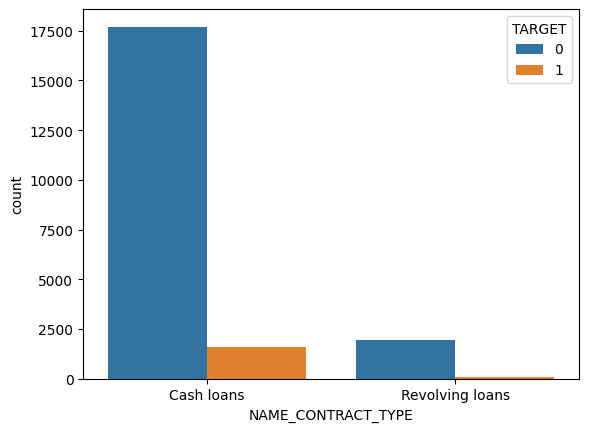

In [51]:
sns.countplot(data=app_df,x='NAME_CONTRACT_TYPE',hue='TARGET')

In [52]:
counts = app_df.groupby(['NAME_CONTRACT_TYPE', 'TARGET']).size()
percentages = counts.groupby(level=0).apply(lambda x: 100 * x / x.sum())
prc=pd.DataFrame(percentages)
prc.rename(columns={0:'percentage'},inplace=True)
prc




percentage
NAME_CONTRACT_TYPE NAME_CONTRACT_TYPE TARGET            
Cash loans         Cash loans         0            91.77
                                      1             8.23
Revolving loans    Revolving loans    0            95.56
                                      1             4.44

obsevation:most customers take cash loans

In [53]:
app_df['CODE_GENDER'].value_counts()

,count
CODE_GENDER,
F,14071
M,7269


<Axes: xlabel='CODE_GENDER', ylabel='count'>

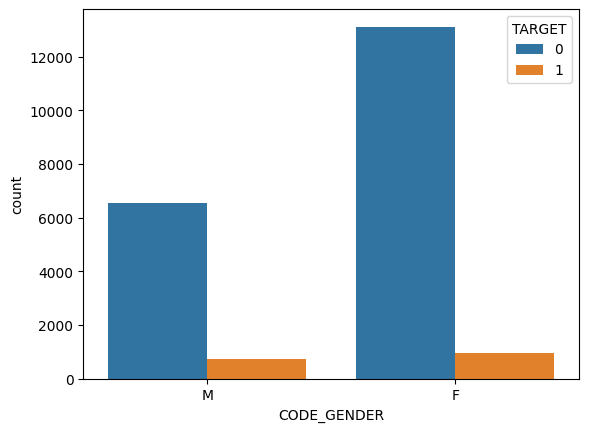

In [54]:
sns.countplot(data=app_df,x='CODE_GENDER',hue='TARGET')

In [55]:
counts = app_df.groupby(['CODE_GENDER', 'TARGET']).size()
percentages = counts.groupby(level=0).apply(lambda x: 100 * x / x.sum())
prc=pd.DataFrame(percentages)
prc.rename(columns={0:'percentage'},inplace=True)
prc

percentage
CODE_GENDER CODE_GENDER TARGET            
F           F           0            93.22
                        1             6.78
M           M           0            90.03
                        1             9.97

observations:females take the most loan comapred   to men and also the precetange of defaulters is less

In [56]:
app_df['NAME_TYPE_SUITE'].value_counts()

,count
NAME_TYPE_SUITE,
Unaccompanied,17329
Family,2814
"Spouse, partner",782
Children,239
Other_B,109
Other_A,50
Group of people,17


<Axes: xlabel='NAME_TYPE_SUITE', ylabel='count'>

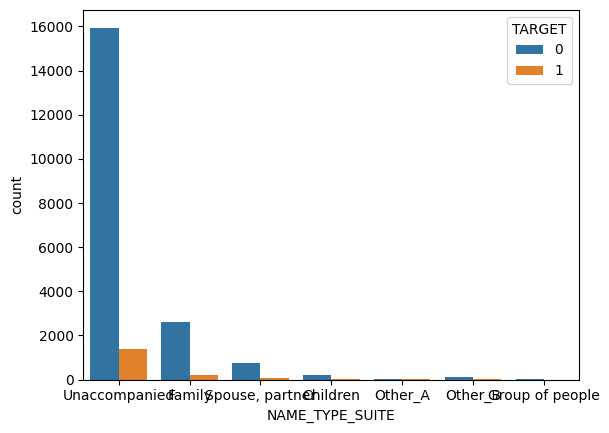

In [57]:
sns.countplot(data=app_df,x='NAME_TYPE_SUITE',hue='TARGET')

In [58]:
app_df['NAME_INCOME_TYPE'].value_counts()

,count
NAME_INCOME_TYPE,
Working,11144
Commercial associate,4923
Pensioner,3811
State servant,1458
Unemployed,2
Student,2


<Axes: xlabel='NAME_INCOME_TYPE', ylabel='count'>

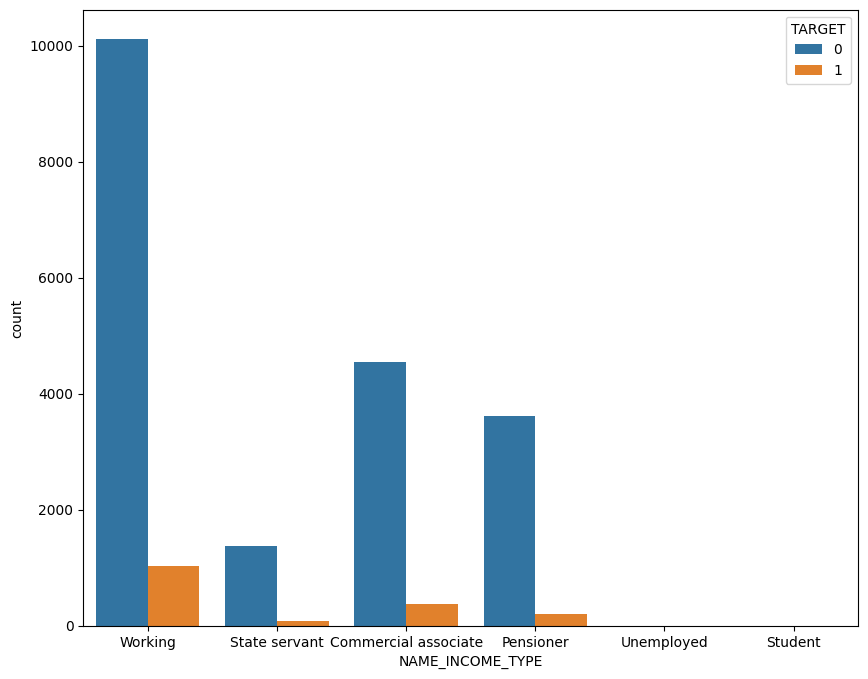

In [59]:
plt.figure(figsize=(10,8))
sns.countplot(data=app_df,x='NAME_INCOME_TYPE',hue='TARGET')

In [60]:

app_df['NAME_EDUCATION_TYPE'].value_counts()

,count
NAME_EDUCATION_TYPE,
Secondary / secondary special,15085
Higher education,5265
Incomplete higher,711
Lower secondary,267
Academic degree,12


<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

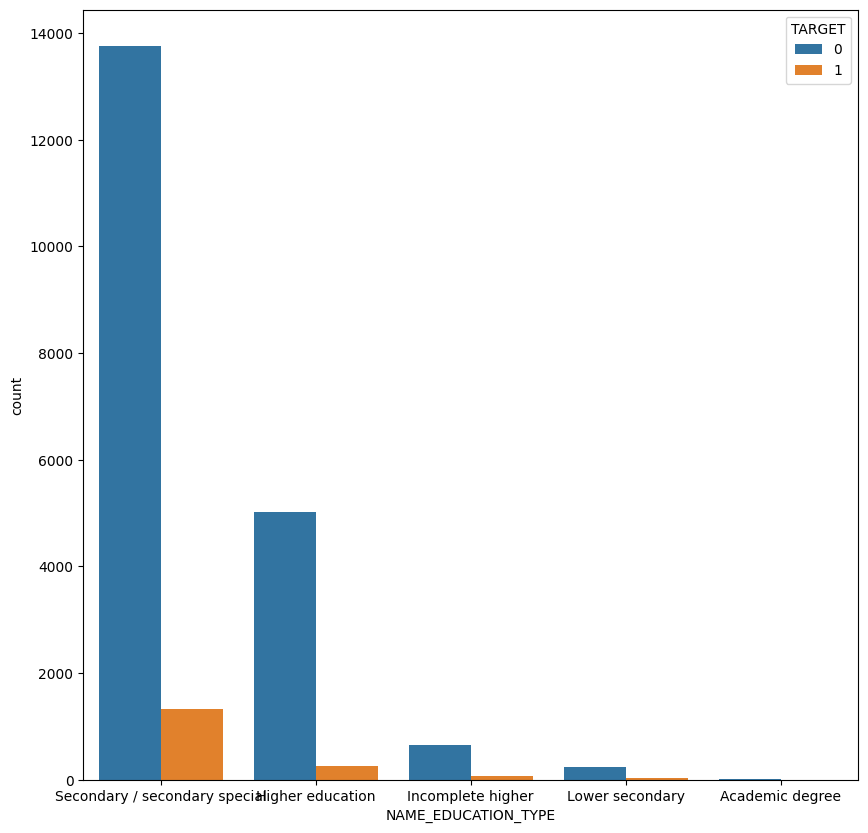

In [61]:
plt.figure(figsize=(10,10))
sns.countplot(data=app_df,x='NAME_EDUCATION_TYPE',hue='TARGET')

observation:most of loan application come from secondary or secondary special people while academic degrees have the lowest loan applicants

In [62]:
app_df['NAME_FAMILY_STATUS'].value_counts()

,count
NAME_FAMILY_STATUS,
Married,13773
Single / not married,3082
Civil marriage,2070
Separated,1323
Widow,1092


<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='count'>

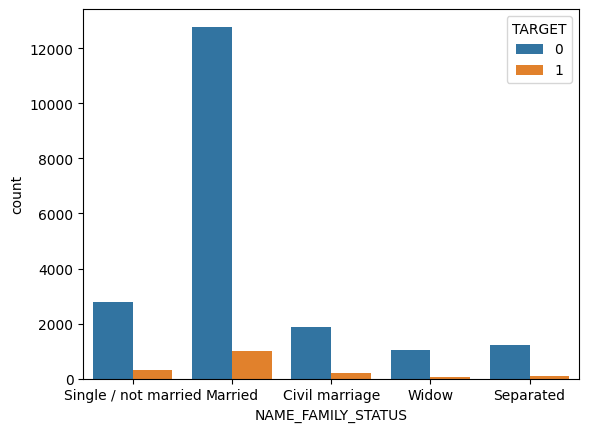

In [63]:
sns.countplot(data=app_df,x='NAME_FAMILY_STATUS',hue='TARGET')

observation:married group has the most loan  applications and the least is widow group

In [64]:
app_df['NAME_HOUSING_TYPE'].value_counts()

,count
NAME_HOUSING_TYPE,
House / apartment,18923
With parents,1031
Municipal apartment,793
Rented apartment,324
Office apartment,184
Co-op apartment,85


<Axes: xlabel='NAME_HOUSING_TYPE', ylabel='count'>

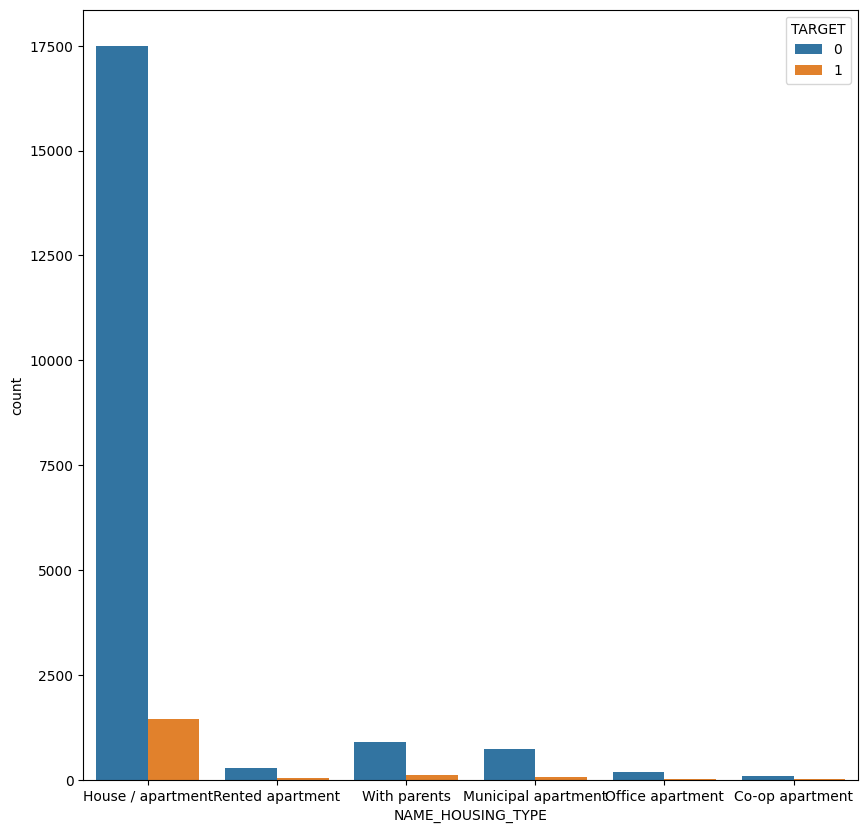

In [65]:
plt.figure(figsize=(10,10))
sns.countplot(data=app_df,x='NAME_HOUSING_TYPE',hue='TARGET')

In [66]:
app_df['OCCUPATION_TYPE'].value_counts()

,count
OCCUPATION_TYPE,
Laborers,10452
Sales staff,2259
Core staff,1935
Managers,1442
Drivers,1283
High skill tech staff,796
Accountants,684
Medicine staff,617
Security staff,470


<Axes: xlabel='OCCUPATION_TYPE', ylabel='count'>

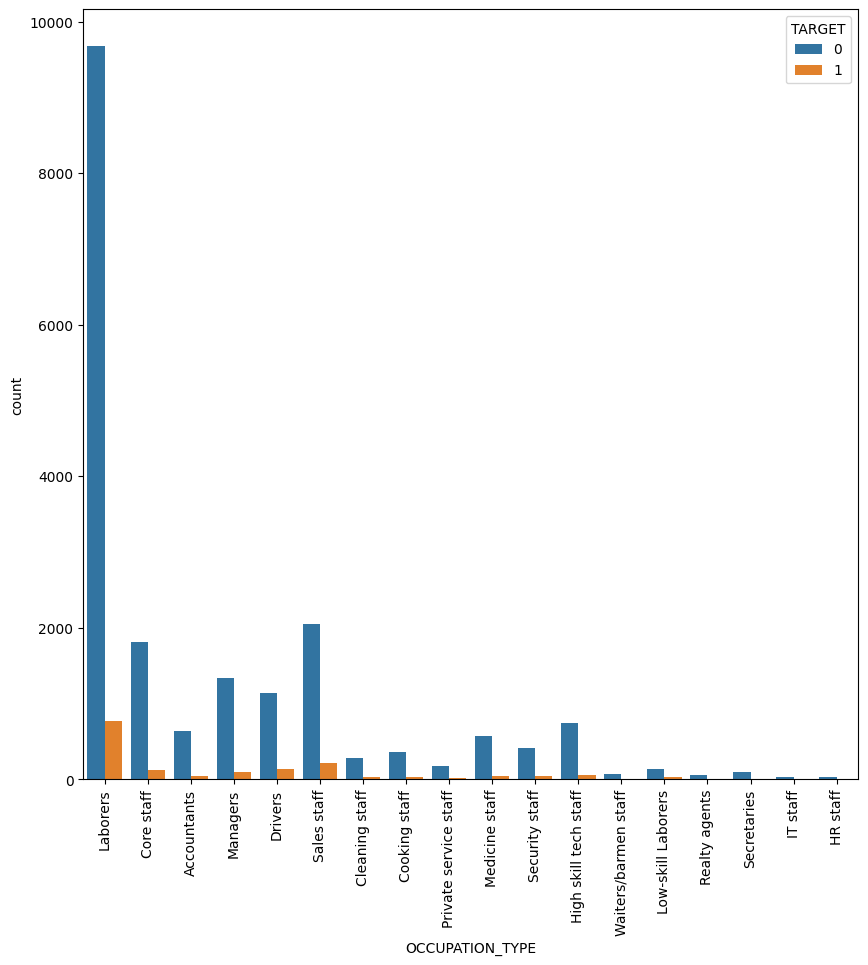

In [67]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(data=app_df,x='OCCUPATION_TYPE',hue='TARGET')

In [68]:
app_df['WEEKDAY_APPR_PROCESS_START'].value_counts()

,count
WEEKDAY_APPR_PROCESS_START,
TUESDAY,3722
FRIDAY,3580
MONDAY,3566
WEDNESDAY,3527
THURSDAY,3487
SATURDAY,2333
SUNDAY,1125


<Axes: xlabel='WEEKDAY_APPR_PROCESS_START', ylabel='count'>

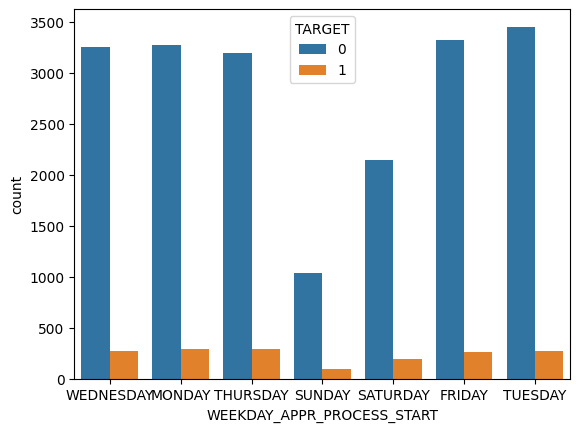

In [69]:
sns.countplot(data=app_df,x='WEEKDAY_APPR_PROCESS_START',hue='TARGET')

In [70]:
app_df['ORGANIZATION_TYPE'].value_counts().sort_values(ascending=False)

,count
ORGANIZATION_TYPE,
Business Entity Type 3,4685
XNA,3812
Self-employed,2718
Other,1151
Medicine,798
Government,736
Business Entity Type 2,717
School,637
Trade: type 7,518


In [71]:
num_var=app_df.select_dtypes(include=['int64','float64']).columns
num_cat_var=app_df.select_dtypes(include=['int64','float64','category']).columns
len(num_var)

33

In [72]:
num_data=app_df[num_var]
defaulters=num_data[num_data['TARGET']==1].drop(['TARGET'],axis=1)
non_defaulters=num_data[num_data['TARGET']==0].drop(['TARGET'],axis=1)

In [73]:
defaulters.head(5)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,202500.00,406597.50,24700.50,351000.00,0.02,9461,637,3648.00,2120,1.00,2,2,10,0,0,0,0,0,0,2.00,2.00,2.00,2.00,1134.00,0.00,0.00,0.00,0.00,0.00,1.00
26,100031,0,112500.00,979992.00,27076.50,702000.00,0.02,18724,2628,6573.00,1827,1.00,3,2,9,0,0,0,0,0,0,10.00,1.00,10.00,0.00,161.00,0.00,0.00,0.00,0.00,2.00,2.00
40,100047,0,202500.00,1193580.00,35028.00,855000.00,0.03,17482,1262,1182.00,1029,2.00,2,2,9,0,0,0,0,0,0,0.00,0.00,0.00,0.00,1075.00,0.00,0.00,0.00,2.00,0.00,4.00
42,100049,0,135000.00,288873.00,16258.50,238500.00,0.01,13384,3597,45.00,4409,2.00,3,3,11,0,0,0,0,0,0,1.00,0.00,1.00,0.00,1480.00,0.00,0.00,0.00,0.00,0.00,2.00
81,100096,0,81000.00,252000.00,14593.50,252000.00,0.03,24794,365243,5391.00,4199,2.00,2,2,10,0,0,0,0,0,0,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [74]:
#finding the correlation of numerical variables to each other
corr=defaulters.corr().stack().reset_index()
corr=corr.rename(columns={0:'correlation','level_0':'variable1','level_1':'variable2'})
corr=corr[corr['variable1']!=corr['variable2']]
corr['correlation']=abs(corr['correlation'])
corr=corr.sort_values(by='correlation',ascending=False)
corr.head(10)

,variable1,variable2,correlation
757,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
695,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,1.00
101,AMT_CREDIT,AMT_GOODS_PRICE,0.98
163,AMT_GOODS_PRICE,AMT_CREDIT,0.98
428,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.94
397,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.94
353,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
43,CNT_CHILDREN,CNT_FAM_MEMBERS,0.89
790,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.89
728,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.89


In [75]:
#finding the correlation of numerical variables to each other
corr_1=non_defaulters.corr().stack().reset_index()
corr_1=corr.rename(columns={0:'correlation','level_0':'variable1','level_1':'variable2'})
corr_1=corr[corr['variable1']!=corr['variable2']]
corr_1['correlation']=abs(corr_1['correlation'])
corr_1=corr.sort_values(by='correlation',ascending=False)
corr_1.head(15)

,variable1,variable2,correlation
757,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
695,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,1.00
101,AMT_CREDIT,AMT_GOODS_PRICE,0.98
163,AMT_GOODS_PRICE,AMT_CREDIT,0.98
428,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.94
397,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.94
353,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
43,CNT_CHILDREN,CNT_FAM_MEMBERS,0.89
790,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.89
728,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.89


In [76]:
amt_vr=['AMT_ANNUITY','AMT_GOODS_PRICE','AMT_CREDIT','AMT_INCOME_TOTAL']

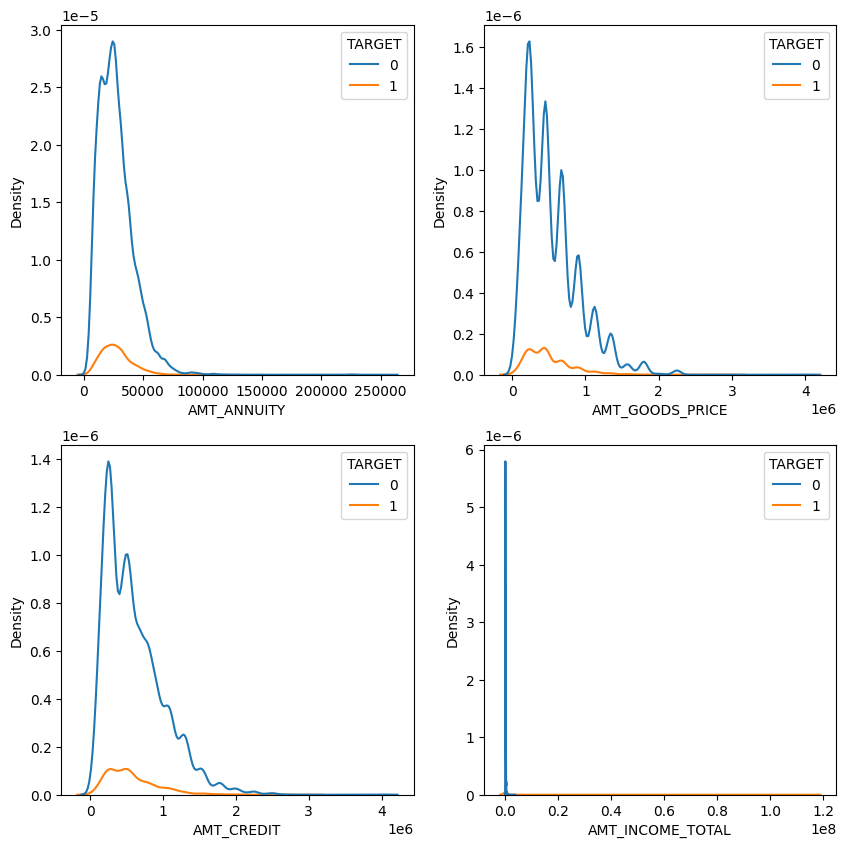

In [77]:
#univariate annlysis
plt.figure(figsize=(10,10))
for i, col in enumerate(amt_vr):
  plt.subplot(2,2,i+1)
  sns.kdeplot(data=app_df,x=col,hue='TARGET')

##observations
most of the loan were given for goods ranging between 0 and 1 million
also most of the credit ranged between 0 to 1 million
most of customers are paying annuity of 0 to 50000
most customers have income between 0 to 1 million

<Axes: xlabel='AMT_CREDIT', ylabel='AMT_INCOME_TOTAL'>

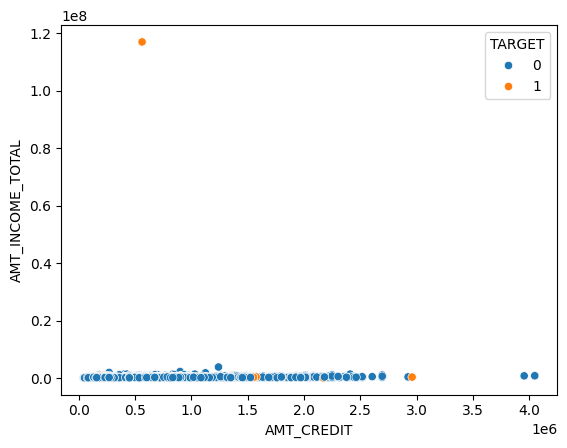

In [78]:
sns.scatterplot(data=app_df,y='AMT_INCOME_TOTAL',x='AMT_CREDIT',hue='TARGET')

<Axes: xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

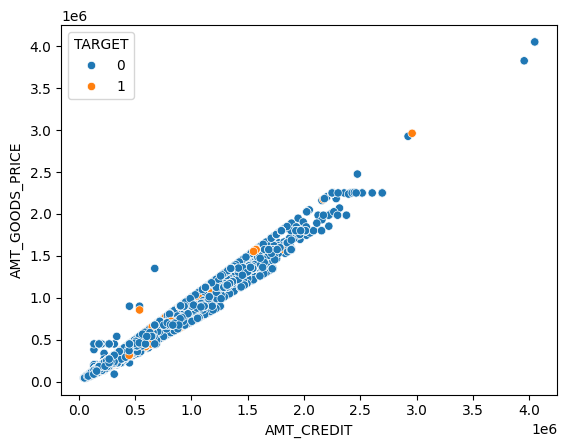

In [79]:
sns.scatterplot(data=app_df,y='AMT_GOODS_PRICE',x='AMT_CREDIT',hue='TARGET')

#prev_application annalysis

In [80]:
missing_prev= pd.DataFrame(prev_app.isnull().sum().sort_values(ascending=False)).reset_index()
missing_prev.rename(columns={'index':'column_name',0:'null_count'},inplace=True)
missing_prev=missing_prev[missing_prev['null_count']>0]
missing_prev['null_percentage']=missing_prev['null_count']/prev_app.shape[0]*100
missing_prev

,column_name,null_count,null_percentage
0,RATE_INTEREST_PRIVILEGED,16911,99.63
1,RATE_INTEREST_PRIMARY,16911,99.63
2,AMT_DOWN_PAYMENT,8271,48.73
3,RATE_DOWN_PAYMENT,8271,48.73
4,NAME_TYPE_SUITE,8183,48.21
5,DAYS_TERMINATION,6396,37.68
6,DAYS_FIRST_DRAWING,6396,37.68
7,DAYS_FIRST_DUE,6396,37.68
8,DAYS_LAST_DUE_1ST_VERSION,6396,37.68
9,DAYS_LAST_DUE,6396,37.68


In [81]:
null=missing_prev[missing_prev['null_percentage']>=40]['column_name'].to_list()
null

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE']

In [82]:
prev_app=prev_app.drop(labels=null,axis=1)
prev_app.shape

(16973, 32)

In [83]:
#droping some unnecessary columns that have no much significant
prev_app=prev_app.drop(labels=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT',
                               'NFLAG_LAST_APPL_IN_DAY'],axis=1)

In [84]:
prev_app.shape

(16973, 28)

In [85]:
prev_app.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,17145.00,XAP,Approved,-73.00,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35.00,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,607500.00,XNA,Approved,-164.00,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1.00,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,112500.00,XNA,Approved,-301.00,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.00,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,450000.00,XNA,Approved,-512.00,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.00,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,337500.00,Repairs,Refused,-781.00,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.00,XNA,24.00,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
prev_app.isnull().sum().sort_values(ascending=False)/prev_app.shape[0]*100

,0
DAYS_TERMINATION,37.68
NFLAG_INSURED_ON_APPROVAL,37.68
DAYS_LAST_DUE,37.68
DAYS_LAST_DUE_1ST_VERSION,37.68
DAYS_FIRST_DUE,37.68
DAYS_FIRST_DRAWING,37.68
AMT_GOODS_PRICE,20.69
CNT_PAYMENT,20.54
AMT_ANNUITY,20.53
PRODUCT_COMBINATION,0.02


In [87]:
#change the  column  that contain days into absolute values
days_col=[]
for col in prev_app.columns:
  if col.startswith('DAYS'):
    days_col.append(col)
days_col

['DAYS_DECISION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

In [88]:
for col in days_col:
  prev_app[col]=abs(prev_app[col])
prev_app.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,17145.00,XAP,Approved,73.00,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35.00,Connectivity,12.00,middle,POS mobile with interest,365243.00,42.00,300.00,42.00,37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,607500.00,XNA,Approved,164.00,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1.00,XNA,36.00,low_action,Cash X-Sell: low,365243.00,134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,112500.00,XNA,Approved,301.00,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.00,XNA,12.00,high,Cash X-Sell: high,365243.00,271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,450000.00,XNA,Approved,512.00,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.00,XNA,12.00,middle,Cash X-Sell: middle,365243.00,482.00,152.00,182.00,177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,337500.00,Repairs,Refused,781.00,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.00,XNA,24.00,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
#handling missimg values in the columns that contain days values
for col in days_col:
  prev_app[col]=prev_app[col].fillna(prev_app[col].mode()[0])
prev_app[days_col].isnull().sum()

,0
DAYS_DECISION,0
DAYS_FIRST_DRAWING,0
DAYS_FIRST_DUE,0
DAYS_LAST_DUE_1ST_VERSION,0
DAYS_LAST_DUE,0
DAYS_TERMINATION,0


In [90]:
prev_app['PRODUCT_COMBINATION'].mode()

,PRODUCT_COMBINATION
0,POS household with interest


In [91]:
#since the data is skewed we are going to fill the missing data with median for continous variables
#for categorical or descrite vriables we fillna with mode()
prev_app['AMT_ANNUITY']=prev_app['AMT_ANNUITY'].fillna(prev_app['AMT_ANNUITY'].median())
prev_app['AMT_GOODS_PRICE']=prev_app['AMT_GOODS_PRICE'].fillna(prev_app['AMT_GOODS_PRICE'].median())
prev_app['NFLAG_INSURED_ON_APPROVAL']=prev_app['NFLAG_INSURED_ON_APPROVAL'].fillna(prev_app['NFLAG_INSURED_ON_APPROVAL'].mode()[0])
prev_app['CNT_PAYMENT']=prev_app['CNT_PAYMENT'].fillna(0)
prev_app['PRODUCT_COMBINATION']=prev_app['PRODUCT_COMBINATION'].fillna(prev_app['PRODUCT_COMBINATION'].mode()[0])


In [92]:
prev_app.isnull().sum()

,0
SK_ID_PREV,0
SK_ID_CURR,0
NAME_CONTRACT_TYPE,0
AMT_ANNUITY,0
AMT_APPLICATION,0
AMT_CREDIT,0
AMT_GOODS_PRICE,0
NAME_CASH_LOAN_PURPOSE,1
NAME_CONTRACT_STATUS,1
DAYS_DECISION,0


In [93]:
prev_app.shape

(16973, 28)

In [94]:
app_df.shape

(21340, 49)

In [95]:
mereged_df=pd.merge(app_df,prev_app,on='SK_ID_CURR',how='inner')
mereged_df.shape

(916, 76)

In [96]:
prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

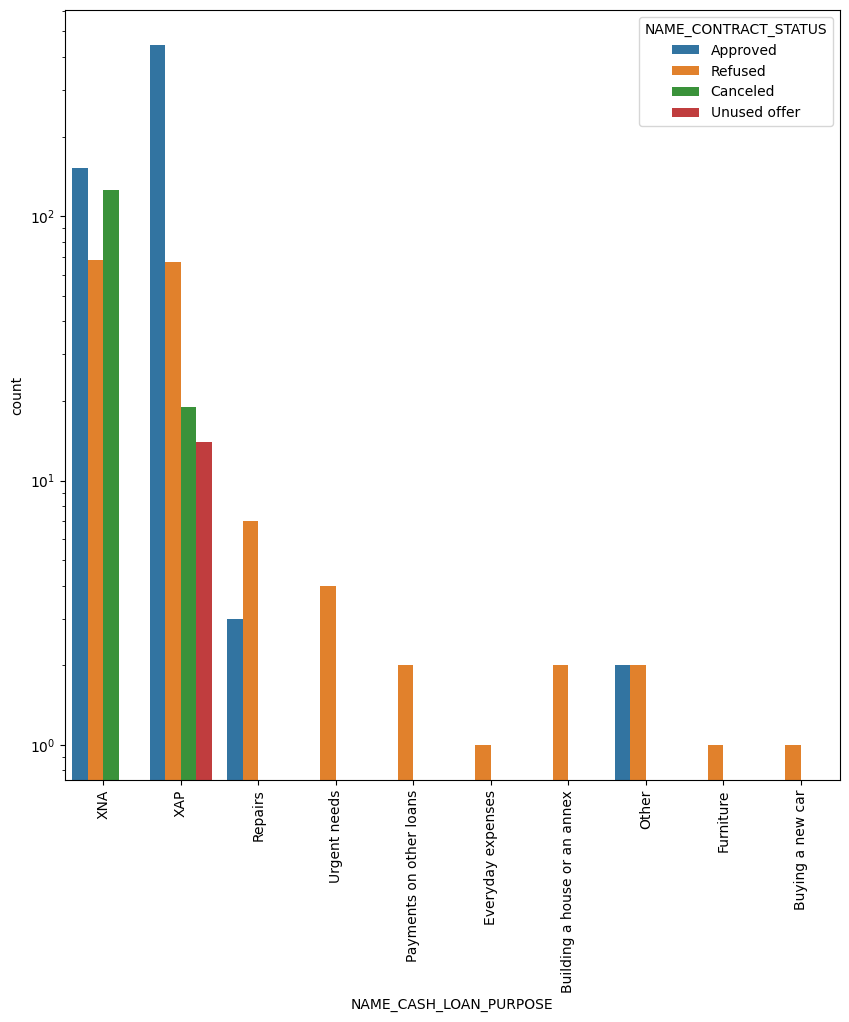

In [97]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(data=mereged_df,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS')
plt.yscale('log')

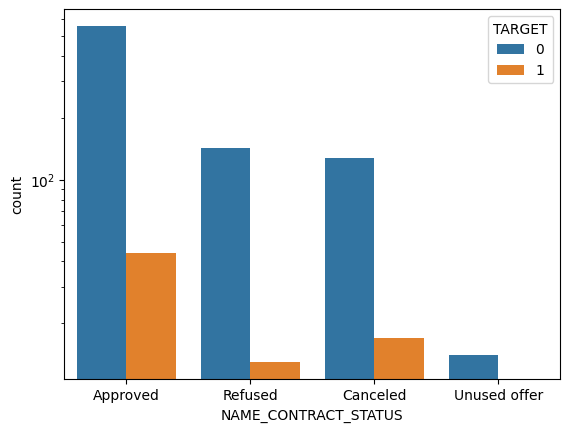

In [98]:
sns.countplot(data=mereged_df,x='NAME_CONTRACT_STATUS',hue='TARGET')
plt.yscale('log')

In [99]:
counts=mereged_df.groupby(['NAME_CONTRACT_STATUS','TARGET']).size()
percentages=counts.groupby(level=0).apply(lambda x:100*x/x.sum())
percentages

NAME_CONTRACT_STATUS  NAME_CONTRACT_STATUS  TARGET
Approved              Approved              0         92.69
                                            1          7.31
Canceled              Canceled              0         88.28
                                            1         11.72
Refused               Refused               0         91.61
                                            1          8.39
Unused offer          Unused offer          0        100.00
dtype: float64

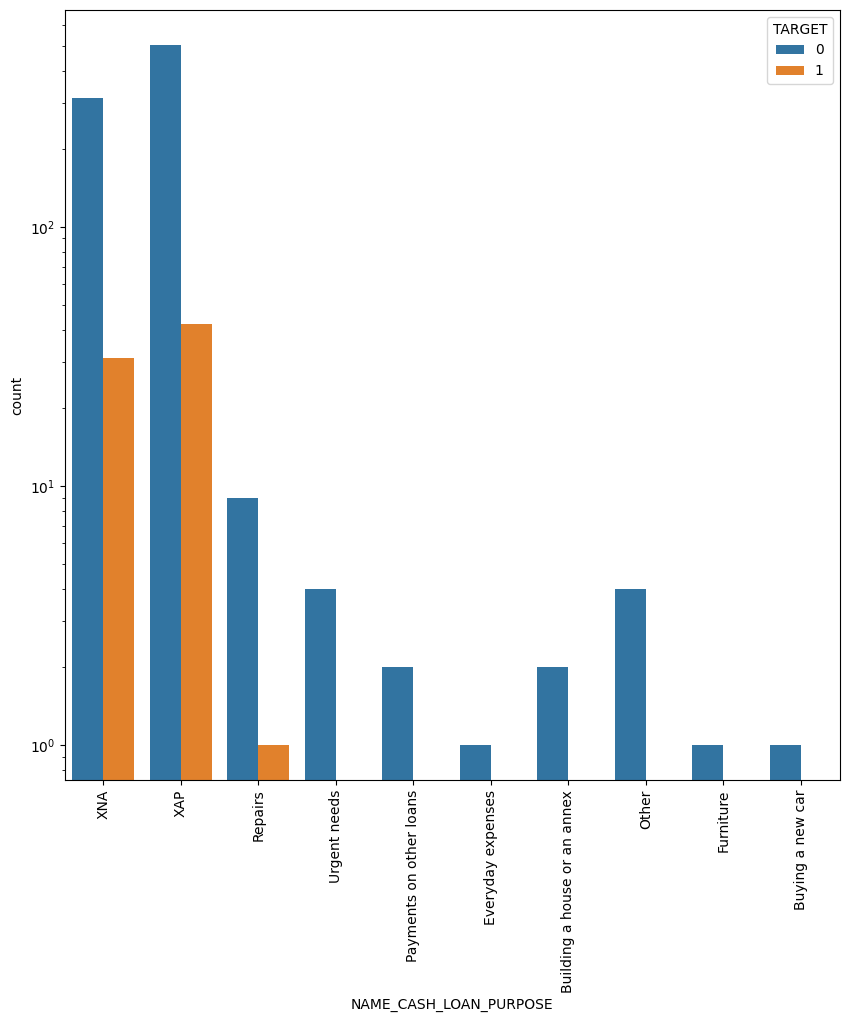

In [100]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(data=mereged_df,x='NAME_CASH_LOAN_PURPOSE',hue='TARGET')
plt.yscale('log')